In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the csv data file  
df = pd.read_csv('creditcard.csv',error_bad_lines=False, warn_bad_lines=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
#Dimensions and information of dataframe columns
print(df.shape)
print(df.info())

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null 

In [3]:
#Checking the missing values in the data set
print(df.isnull().any())#columns with null values

#There are no missing values present 

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool


In [4]:
print(df.describe(include = [np.number]))#Summary statistics of numerical data 


                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [5]:
Count_class = df["Class"].value_counts()#checking the number of counts for each type of value in class column
print('Count for classes:')
print(Count_class) 
#checking the percentage of fraud and non fraud transactions
nonfraud=100*Count_class[0]/df['Class'].count()
fraud=100*Count_class[1]/df['Class'].count()
print("Number of non-fraud transactions", nonfraud, "%")
print("Number of fraud transactions", fraud, "%")

Count for classes:
0    284315
1       492
Name: Class, dtype: int64
Number of non-fraud transactions 99.827251436938 %
Number of fraud transactions 0.1727485630620034 %


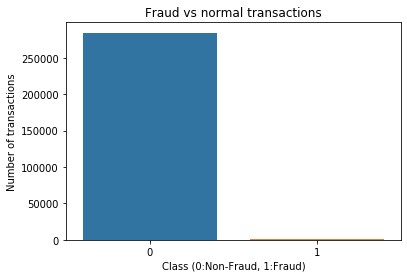

In [6]:
#Data Exploration
sns.barplot(x = Count_class.index, y = Count_class)
plt.xlabel('Class (0:Non-Fraud, 1:Fraud)')
plt.ylabel("Number of transactions")
plt.title("Fraud vs normal transactions")
plt.savefig('Fraud vs normal transactions.png')
plt.show()

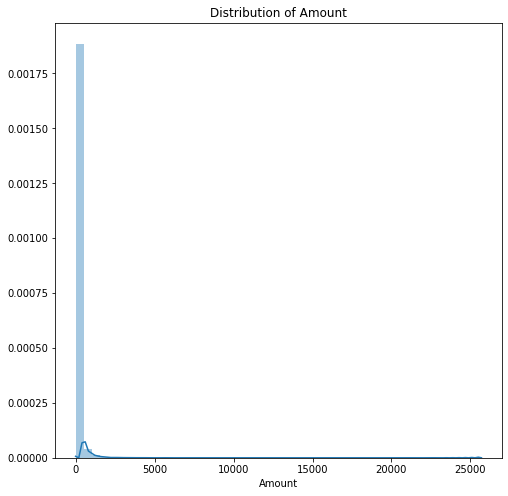

In [7]:
plt.figure(figsize=(8,8))
plt.title('Distribution of Amount')
sns.distplot(df.Amount)

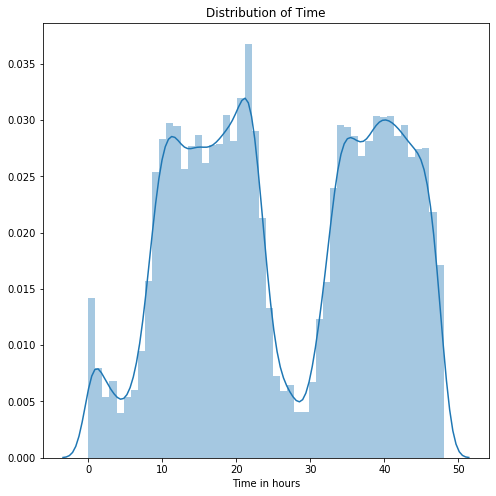

In [8]:
plt.figure(figsize=(8,8))
plt.title('Distribution of Time')
sns.distplot(df['Time'].values/(60*60))#Convert time to hours
plt.xlabel("Time in hours")
plt.show()

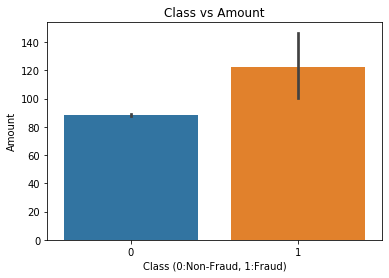

In [9]:
#Relationship between class and amount
sns.barplot(x=df['Class'],y=df['Amount'],data=df)
plt.xlabel('Class (0:Non-Fraud, 1:Fraud)')
plt.ylabel("Amount")
plt.title("Class vs Amount")
plt.show()

#Fraud transactions involve more amount

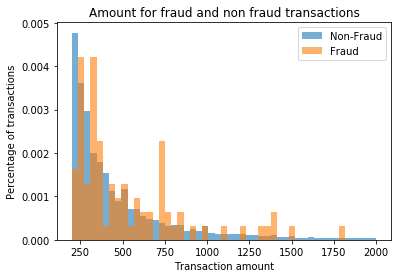

In [10]:
#histogram between amount and transactions
df_nf = df[df.Class == 0] #Non-fraud observations
df_fr = df[df.Class == 1] #Fraud observations

bins = np.linspace(200, 2000)#Since the amount observed in the distplot has most transactions with value < 2000
plt.hist(df_nf.Amount, bins,density=True,alpha=0.6, label='Non-Fraud')
plt.hist(df_fr.Amount, bins,density=True,alpha=0.6, label='Fraud')

plt.legend()
plt.title("Amount for fraud and non fraud transactions")
plt.xlabel("Transaction amount")
plt.ylabel("Percentage of transactions")
plt.show()

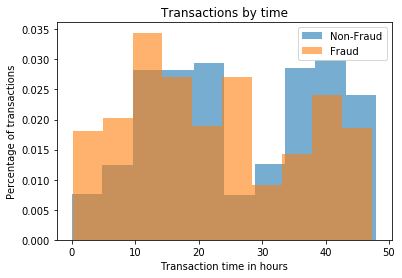

In [11]:
#histogram between time and transactions
plt.hist((df_nf['Time'].values/(60*60)),density=True, alpha=0.6, label='Non-Fraud')
plt.hist((df_fr['Time'].values/(60*60)),density=True, alpha=0.6, label='Fraud')
plt.legend()
plt.title("Transactions by time")
plt.xlabel("Transaction time in hours")
plt.ylabel("Percentage of transactions")
plt.show()

SpearmanrResult(correlation=-0.04000698969643758, pvalue=3.208528582297967e-101)


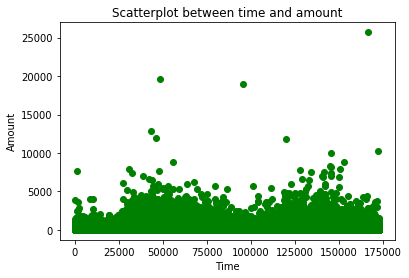

In [12]:
#Exploring the relationships between the columns
#Exploring relationship between time and amount 

y = scipy.stats.spearmanr(a=df["Time"], 
                      b=df["Amount"],nan_policy='omit')
print(y)

#Correlation is not very strong as correlation=-0.04 

plt.scatter(df["Time"], df["Amount"], color='green')

#x-axis label
plt.xlabel("Time")

#y-axis label
plt.ylabel("Amount")

#plot title
plt.title("Scatterplot between time and amount")

#Save fig
plt.savefig('Scatterplot between time and amount.png')

#Show the plot
plt.show()


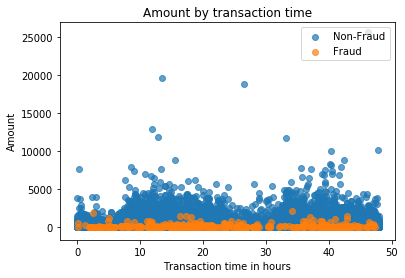

In [13]:
plt.scatter((df_nf.Time/(60*60)), df_nf.Amount, alpha=0.7, label='Non-Fraud')
plt.scatter((df_fr.Time/(60*60)), df_fr.Amount, alpha=0.7, label='Fraud')
plt.title("Amount by transaction time")
plt.xlabel("Transaction time in hours")
plt.ylabel('Amount')
plt.legend(loc='upper right')
plt.show()

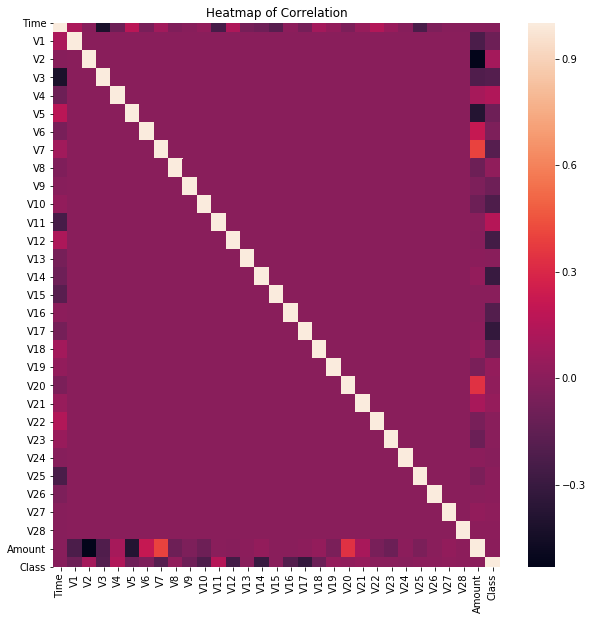

In [14]:
correl = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=correl)
plt.title('Heatmap of Correlation')
plt.savefig('Heatmap of correlation')

In [15]:
from sklearn.preprocessing import RobustScaler
#Performing Feature scaling
df['amount_scaled'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['time_scaled'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))

df = df.drop(['Time','Amount'],axis = 1,inplace=False)#drop original time and amount columns
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,amount_scaled,time_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [16]:
#Splitting the variables into features and target 
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df.Class

print(X.shape)#printing dimensions of features
print(y.shape)#printing dimensions of label

print(y[:3])#printing the first 3 rows of label

# Splitting the data into 80% for training and 20% for testing, 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=0)
                                                
# Check shapes and confirm the rows 284807*0.8 = 227845
print(X_train.shape, y_train.shape)

# Check shapes and confirm the rows 284807*0.2 = 56962
print(X_test.shape, y_test.shape)

count = y_train.value_counts()#Class count in training data
print('Count for classes:')
print(count)

(284807, 30)
(284807,)
0    0
1    0
2    0
Name: Class, dtype: int64
(227845, 30) (227845,)
(56962, 30) (56962,)
Count for classes:
0    227451
1       394
Name: Class, dtype: int64


(788, 30)
(788,)
Count for classes after undersampling:
1    394
0    394
Name: Class, dtype: int64


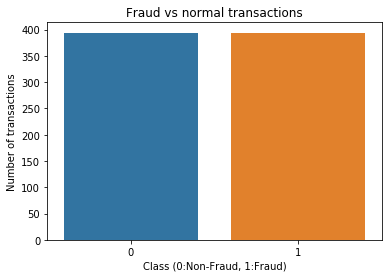

In [17]:
#Undersampling using NearMiss
from imblearn.under_sampling import NearMiss

undersamp = NearMiss(version=1, n_neighbors=3)
X_u, y_u = undersamp.fit_resample(X_train, y_train)

print(X_u.shape)#printing dimensions of features
print(y_u.shape)#printing dimensions of label
Under_class = y_u.value_counts()
print('Count for classes after undersampling:')
print(Under_class)

sns.barplot(x = Under_class.index, y = Under_class)
plt.xlabel('Class (0:Non-Fraud, 1:Fraud)')
plt.ylabel("Number of transactions")
plt.title("Fraud vs normal transactions")
plt.savefig('Fraud vs normal transactions.png')
plt.show()

In [18]:
#Using KNN model
#Checking the best k to use in 5-fold cross validation

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,recall_score

n = np.arange(1, 10, 2)
cscores = []
for k in n:
    knn = KNeighborsClassifier(n_neighbors=k)
    s = cross_val_score(knn, X_u, y_u, cv=5, scoring='roc_auc')
    cscores.append(s.mean())
best_k = n[np.argmax(cscores)]
print('cscores:', cscores )
print('Best k to use:', best_k)

cscores: [0.9555988315481987, 0.9708445802981934, 0.9727406439632045, 0.9733374007288443, 0.9732168168316221]
Best k to use: 7


[0 1 0 ... 0 0 1]
AUC Score: 0.9021348286782356


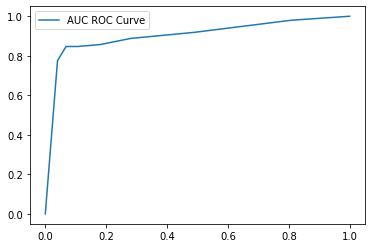

0.8571428571428571
[[46505 10359]
 [   14    84]]


In [27]:
#Train the KNN model with best_k

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_u, y_u)
y_pred = knn.predict(X_test)
print(y_pred)

# Evaluate the performance of the trained model 

# predict probabilities
prob = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
prob = prob[:, 1]

aucK1 = roc_auc_score(y_test, prob)
print('AUC Score:', aucK1)
fpr, tpr, thresholds = roc_curve(y_test, prob)
plt.plot(fpr,tpr,label="AUC ROC Curve")
plt.legend()
plt.show()
recall_K1 = recall_score(y_test, y_pred)
print(recall_K1)
print(confusion_matrix(y_test,y_pred))

In [28]:
from sklearn.ensemble import RandomForestClassifier

n = np.arange(5, 15)
cscores = []
for node in n:
    model_node = RandomForestClassifier(random_state=42, n_estimators= 8, \
                               max_depth= 3, min_samples_leaf= 8, min_samples_split = 26,\
                              max_leaf_nodes =node)
    s = cross_val_score(model_node, X_u, y_u, cv=5, scoring='precision')
    cscores.append(s.mean())
best_maxleaf_node = n[np.argmax(cscores)]
print('cscores:', cscores )
print('Best max leaf node to use:', best_maxleaf_node)

cscores: [0.9625229166207872, 0.9619767631961725, 0.9619767631961725, 0.9619767631961725, 0.9619767631961725, 0.9619767631961725, 0.9619767631961725, 0.9619767631961725, 0.9619767631961725, 0.9619767631961725]
Best max leaf node to use: 5


[0 1 1 ... 0 1 1]
AUC Score: 0.8598622886830591


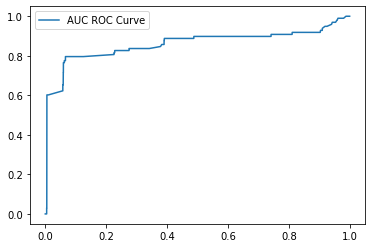

[[24561 32303]
 [   10    88]]
Recall: 0.8979591836734694


In [29]:
#Train the random forest model with best_maxleaf_node 

model_node = RandomForestClassifier(random_state=42, n_estimators= 8, \
                               max_depth= 3, min_samples_leaf= 8, min_samples_split = 26,\
                              max_leaf_nodes =best_maxleaf_node)
model_node.fit(X_u, y_u)
y_pred = model_node.predict(X_test)
print(y_pred)
# Evaluate the performance of the trained model 
prob = model_node.predict_proba(X_test)# predict probabilities
# keep probabilities for the positive outcome only
prob = prob[:, 1]
aucR1 = roc_auc_score(y_test, prob)
print('AUC Score:', aucR1)
fpr, tpr, thresholds = roc_curve(y_test, prob)
plt.plot(fpr,tpr,label="AUC ROC Curve")
plt.legend()
plt.show()
print(confusion_matrix(y_test,y_pred))
recall_R1 = recall_score(y_test, y_pred)
print("Recall:", recall_R1)

In [30]:
# Random Forest for imbalanced data

n = np.arange(5, 15)
cscores = []
for node in n:
    model_node = RandomForestClassifier(random_state=42, n_estimators= 8, \
                               max_depth= 3, min_samples_leaf= 8, min_samples_split = 26,\
                              max_leaf_nodes =node, class_weight='balanced_subsample')
    s = cross_val_score(model_node, X_train, y_train, cv=5, scoring='roc_auc')
    cscores.append(s.mean())
best_maxleaf_node = n[np.argmax(cscores)]
print('cscores:', cscores )
print('Best max leaf node to use:', best_maxleaf_node)

cscores: [0.9729785624223195, 0.9733719053737909, 0.9732397681121, 0.9734732897900461, 0.9734732897900461, 0.9734732897900461, 0.9734732897900461, 0.9734732897900461, 0.9734732897900461, 0.9734732897900461]
Best max leaf node to use: 8


[0 0 0 ... 0 0 1]
AUC Score: 0.9568883652222849


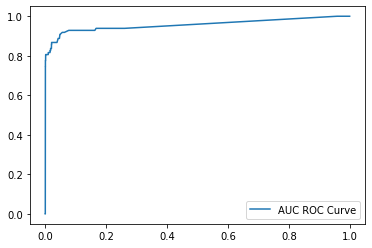

[[56028   836]
 [   18    80]]
Recall: 0.8163265306122449


In [31]:
#Train the random forest model with best_maxleaf_node 
model_node = RandomForestClassifier(random_state=42, n_estimators= 8, \
                               max_depth= 3, min_samples_leaf= 8, min_samples_split = 26,\
                              max_leaf_nodes =best_maxleaf_node, class_weight='balanced_subsample')
model_node.fit(X_train, y_train)
y_pred = model_node.predict(X_test)
print(y_pred)

# Evaluate the performance of the trained model 
prob = model_node.predict_proba(X_test)# predict probabilities
# keep probabilities for the positive outcome only
prob = prob[:, 1]
aucR2 = roc_auc_score(y_test, prob)
print('AUC Score:', aucR2)
fpr, tpr, thresholds = roc_curve(y_test, prob)
plt.plot(fpr,tpr,label="AUC ROC Curve")
plt.legend()
plt.show()
print(confusion_matrix(y_test,y_pred))
recall_R2 = recall_score(y_test, y_pred)
print("Recall:", recall_R2)

(454902, 30)
(454902,)
Count for classes after Smote:
1    227451
0    227451
Name: Class, dtype: int64


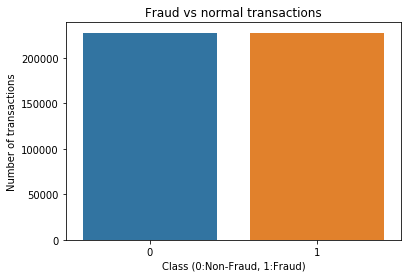

In [32]:
#Using SMOTE for oversampling
from imblearn import over_sampling

smo = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = smo.fit_resample(X_train, y_train)
    
print(X_train_smote.shape)#printing dimensions of features
print(y_train_smote.shape)#printing dimensions of label
smote_class = y_train_smote.value_counts()
print('Count for classes after Smote:')
print(smote_class)

sns.barplot(x = smote_class.index, y = smote_class)
plt.xlabel('Class (0:Non-Fraud, 1:Fraud)')
plt.ylabel("Number of transactions")
plt.title("Fraud vs normal transactions")
plt.savefig('Fraud vs normal transactions.png')
plt.show()

[0 0 0 ... 0 0 0]
AUC Score: 0.9331436517347513


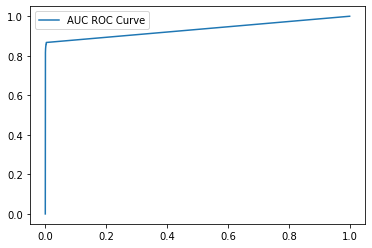

[[56734   130]
 [   14    84]]
Recall: 0.8571428571428571


In [34]:
#Train the KNN model with K = 7

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_smote, y_train_smote)
y_pred = knn.predict(X_test)
print(y_pred)

# Evaluate the performance of the trained model 
prob = knn.predict_proba(X_test)# predict probabilities
# keep probabilities for the positive outcome only
prob = prob[:, 1]
aucK2 = roc_auc_score(y_test, prob)
print('AUC Score:', aucK2)
fpr, tpr, thresholds = roc_curve(y_test, prob)
plt.plot(fpr,tpr,label="AUC ROC Curve")
plt.legend()
plt.show()
print(confusion_matrix(y_test,y_pred))
recall_K2 = recall_score(y_test, y_pred)
print("Recall:", recall_K2)

[0 0 0 ... 0 0 0]
AUC Score: 0.9683576388490118


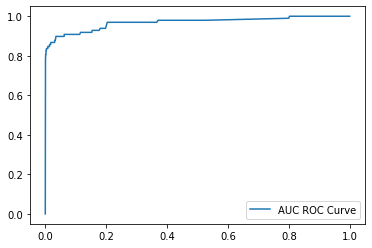

[[55788  1076]
 [   13    85]]
0.8673469387755102


In [35]:
model_node = RandomForestClassifier(random_state=42, n_estimators= 8, \
                               max_depth= 5, min_samples_leaf= 8, min_samples_split = 26,\
                              max_leaf_nodes =8)
model_node.fit(X_train_smote, y_train_smote)
y_pred = model_node.predict(X_test)
print(y_pred)

# Evaluate the performance of the trained model 

# predict probabilities
prob = model_node.predict_proba(X_test)
# keep probabilities for the positive outcome only
prob = prob[:, 1]

# calculate AUC
aucR3 = roc_auc_score(y_test, prob)
print('AUC Score:', aucR3)
fpr, tpr, thresholds = roc_curve(y_test, prob)
plt.plot(fpr,tpr,label="AUC ROC Curve")
plt.legend()
plt.show()
print(confusion_matrix(y_test,y_pred))
recall_R3 = recall_score(y_test, y_pred)
print(recall_R3)

                                  Model  AUC Score    Recall
0          KNN Model with undersampling   0.902135  0.857143
1      Random Forest with undersampling   0.859862  0.897959
2  Random Forest with balancing weights   0.956888  0.816327
3                  KNN Model with SMOTE   0.933144  0.857143
4              Random Forest with SMOTE   0.968358  0.867347


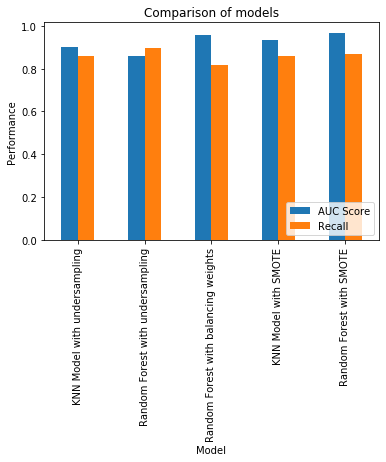

In [39]:
#Comparing the models performance with graphical visualisations
data = [['KNN Model with undersampling', aucK1, recall_K1], ['Random Forest with undersampling', aucR1, recall_R1],\
       ['Random Forest with balancing weights', aucR2, recall_R2], ['KNN Model with SMOTE', aucK2, recall_K2],\
       ['Random Forest with SMOTE', aucR3, recall_R3]]
dfm = pd.DataFrame(data, columns = ['Model', 'AUC Score','Recall'])
print(dfm)

dfm.plot( kind='bar',x= 'Model', y=['AUC Score', 'Recall'], title='Comparison of models')

#x-axis label
plt.xlabel("Model")

#y-axis label
plt.ylabel("Performance")

plt.legend(loc='lower right')

#Show plot
plt.show()